## Question 8 -
### Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding
- Insights to be drawn -
- ● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
- ● Get all the episode names, whose average rating is more than 8 for every season
- ● Get all the episode names that aired before May 2019
- ● Get the episode name from each season with the highest and lowest rating
- ● Get the summary for the most popular ( ratings ) episode in every season

In [5]:
import requests
import json
import matplotlib.pyplot as plt

In [2]:
# Function to download data from the API
def download_data(url):
    response = requests.get(url)
    data = json.loads(response.text)
    return data

# Function to extract and format the data
def extract_data(data):
    # Extract relevant information from the data
    episode_id = data['id']
    episode_url = data['url']
    episode_name = data['name']
    season = data.get('season')
    episode_number = data.get('number')
    episode_type = data.get('type')
    airdate = data.get('airdate')
    airtime = data.get('airtime')
    runtime = data.get('runtime')
    average_rating = data['rating']['average']
    summary = data.get('summary', '').replace('<p>', '').replace('</p>', '')
    image_medium = data['image']['medium']
    image_original = data['image']['original']

    # Format the extracted data into a dictionary
    formatted_data = {
        'id': episode_id,
        'url': episode_url,
        'name': episode_name,
        'season': season,
        'number': episode_number,
        'type': episode_type,
        'airdate': airdate,
        'airtime': airtime,
        'runtime': runtime,
        'rating': average_rating,
        'summary': summary,
        'image_medium': image_medium,
        'image_original': image_original
    }

    return formatted_data

In [4]:
def main():
    # API URL
    url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
    
    # Download data from the API
    data = download_data(url)
    
    # Extract and format the data
    formatted_data = extract_data(data)
    
    # Display the extracted and formatted data
    for key, value in formatted_data.items():
        print(f"{key}: {value}")

    # Count the number of seasons
    seasons = set()
    episodes_data = data.get('_embedded', {}).get('episodes', [])
    for episode in episodes_data:
        season = episode.get('season')
        if season:
            seasons.add(season)

    num_seasons = len(seasons)
    print("")
    print("------------------------------------")
    print(f"Number of seasons: {num_seasons}")
    print("------------------------------------")

if __name__ == "__main__":
    main()

id: 1371
url: https://www.tvmaze.com/shows/1371/westworld
name: Westworld
season: None
number: None
type: Scripted
airdate: None
airtime: None
runtime: 60
rating: 8.2
summary: <b>Westworld</b> is a dark odyssey about the dawn of artificial consciousness and the evolution of sin. Set at the intersection of the near future and the reimagined past, it explores a world in which every human appetite, no matter how noble or depraved, can be indulged.
image_medium: https://static.tvmaze.com/uploads/images/medium_portrait/445/1113927.jpg
image_original: https://static.tvmaze.com/uploads/images/original_untouched/445/1113927.jpg

------------------------------------
Number of seasons: 4
------------------------------------


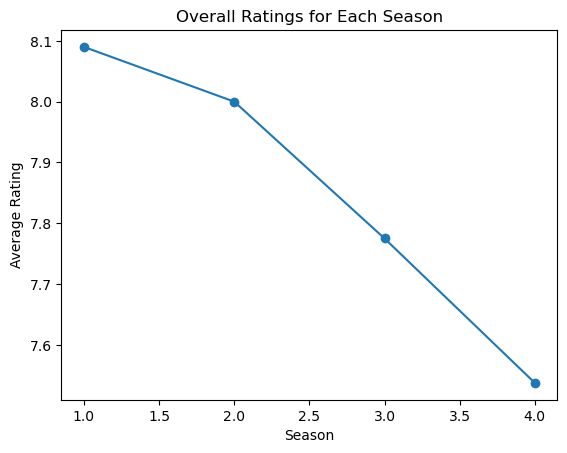

In [9]:
import requests

url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

def download_data(url):
    response = requests.get(url)
    data = response.json()
    return data

## a.
def extract_ratings(data):
    ratings = {}
    episodes = data.get('_embedded', {}).get('episodes', [])
    for episode in episodes:
        season = episode.get('season')
        rating = episode.get('rating', {}).get('average')
        if season and rating:
            if season in ratings:
                ratings[season].append(rating)
            else:
                ratings[season] = [rating]
    return ratings

def plot_season_ratings(ratings):
    seasons = sorted(ratings.keys())
    avg_ratings = [sum(ratings[season]) / len(ratings[season]) for season in seasons]

    #plt.bar(seasons, avg_ratings)
    plt.plot(seasons, avg_ratings,marker='o')

    plt.xlabel('Season')
    plt.ylabel('Average Rating')
    plt.title('Overall Ratings for Each Season')
    plt.show()

data = download_data(url)
ratings = extract_ratings(data)
plot_season_ratings(ratings)


In [10]:
## b.
def extract_highly_rated_episodes(data):
    episodes = data.get('_embedded', {}).get('episodes', [])
    highly_rated_episodes = {}
    for episode in episodes:
        season = episode.get('season')
        rating = episode.get('rating', {}).get('average')
        name = episode.get('name')
        if season and rating and rating > 8:
            if season in highly_rated_episodes:
                highly_rated_episodes[season].append(name)
            else:
                highly_rated_episodes[season] = [name]
    return highly_rated_episodes


highly_rated_episodes = extract_highly_rated_episodes(data)

for season, episodes in highly_rated_episodes.items():
    print(f"Season {season} highly rated episodes:")
    for episode in episodes:
        print(f"- {episode}")

Season 1 highly rated episodes:
- Trompe L'Oeil
- The Well-Tempered Clavier
- The Bicameral Mind
Season 2 highly rated episodes:
- Kiksuya
- Vanishing Point
- The Passenger


In [11]:
## c.
def extract_episodes_before_date(data, target_date):
    episodes = data.get('_embedded', {}).get('episodes', [])
    episodes_before_date = []
    for episode in episodes:
        airdate = episode.get('airdate')
        name = episode.get('name')
        if airdate and airdate < target_date:
            episodes_before_date.append(name)
    return episodes_before_date


    
target_date = "2019-05-01"
episodes_before_date = extract_episodes_before_date(data, target_date)

print("Episodes aired before May 2019:")
for episode in episodes_before_date:
    print("- " + episode)
   

Episodes aired before May 2019:
- The Original
- Chestnut
- The Stray
- Dissonance Theory
- Contrapasso
- The Adversary
- Trompe L'Oeil
- Trace Decay
- The Well-Tempered Clavier
- The Bicameral Mind
- Journey Into Night
- Reunion
- Virtù e Fortuna
- The Riddle of the Sphinx
- Akane No Mai
- Phase Space
- Les Écorchés
- Kiksuya
- Vanishing Point
- The Passenger


In [12]:
## d.
def extract_episodes_by_season(data):
    episodes = data.get('_embedded', {}).get('episodes', [])
    episodes_by_season = {}
    for episode in episodes:
        season = episode.get('season')
        name = episode.get('name')
        rating = episode.get('rating', {}).get('average')
        if season:
            if season not in episodes_by_season:
                episodes_by_season[season] = {'highest': (name, rating), 'lowest': (name, rating)}
            else:
                current_highest = episodes_by_season[season]['highest']
                current_lowest = episodes_by_season[season]['lowest']
                if rating and rating > current_highest[1]:
                    episodes_by_season[season]['highest'] = (name, rating)
                if rating and rating < current_lowest[1]:
                    episodes_by_season[season]['lowest'] = (name, rating)
    return episodes_by_season


episodes_by_season = extract_episodes_by_season(data)

for season, episodes in episodes_by_season.items():
    print(f"Season {season}:")
    print(f"Highest Rating: Episode {episodes['highest'][0]} (Rating: {episodes['highest'][1]})")
    print(f"Lowest Rating: Episode {episodes['lowest'][0]} (Rating: {episodes['lowest'][1]})")

Season 1:
Highest Rating: Episode The Bicameral Mind (Rating: 8.7)
Lowest Rating: Episode The Stray (Rating: 7.6)
Season 2:
Highest Rating: Episode Kiksuya (Rating: 8.7)
Lowest Rating: Episode Akane No Mai (Rating: 7.6)
Season 3:
Highest Rating: Episode Parce Domine (Rating: 8)
Lowest Rating: Episode Decoherence (Rating: 7.5)
Season 4:
Highest Rating: Episode Zhuangzi (Rating: 7.8)
Lowest Rating: Episode The Auguries (Rating: 7.1)


In [13]:
## e.
def get_summary_most_popular_episode(data):
    episodes = data.get('_embedded', {}).get('episodes', [])
    most_popular_episodes_summary = {}
    for episode in episodes:
        season = episode.get('season')
        rating = episode.get('rating', {}).get('average')
        if season:
            if season not in most_popular_episodes_summary:
                most_popular_episodes_summary[season] = {
                    'name': episode.get('name'),
                    'rating': rating,
                    'summary': episode.get('summary')
                }
            else:
                if rating and rating > most_popular_episodes_summary[season]['rating']:
                    most_popular_episodes_summary[season] = {
                        'name': episode.get('name'),
                        'rating': rating,
                        'summary': episode.get('summary')
                    }
    return most_popular_episodes_summary
    
most_popular_episodes_summary = get_summary_most_popular_episode(data)

    
for season, episode in most_popular_episodes_summary.items():
    print(f"Season {season}:")
    print(f"Episode: {episode['name']}")
    print(f"Rating: {episode['rating']}")
    print(f"Summary: {episode['summary']}")


Season 1:
Episode: The Bicameral Mind
Rating: 8.7
Summary: <p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>
Season 2:
Episode: Kiksuya
Rating: 8.7
Summary: <p>Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.</p>
Season 3:
Episode: Parce Domine
Rating: 8
Summary: <p>If you're stuck in a loop, try walking in a straight line.</p>
Season 4:
Episode: Zhuangzi
Rating: 7.8
Summary: <p>God is bored.</p>
